In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

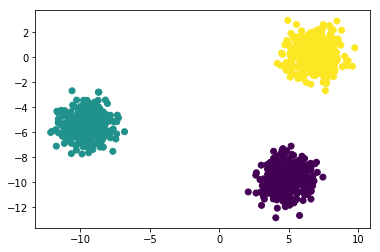

In [102]:
X, Y = make_blobs(n_samples=1000, n_features=3, centers=3, center_box=(-10, 10))

plt.scatter(X[:, 0], X[:, 1], c=Y)

In [106]:
class Cluster:
    
    def __init__(self, id, center):
        self.id = id
        self.center = center
        self.points = list()
        
    def update_center(self):
        if len(self.points) > 0:
            self.center = np.mean(self.points, axis=0)
    
    

In [107]:
class KMeans:
    
    def __init__(self, points, k):
        self.points = points
        self.labels = list()
        self.clusters = list()
        
        for i in range(k):
            cluster = Cluster(i, self.points[i])
#             cluster = Cluster(i, np.random.randint(-5, 5, 2))
            self.clusters.append(cluster)
            
    
    def distribute(self):
        
        for cluster in self.clusters:
            cluster.points = list()
        
        self.labels = list()
        
        for point in self.points:
            distance = list()
            for cluster in self.clusters:
                d = self.distance(cluster.center, point)
                distance.append((d, cluster))
            
            distance = sorted(distance, key=lambda row: row[0])
            chosen = distance[0]
            chosen_cluster = chosen[1]
            chosen_cluster.points.append(point)
            self.labels.append(chosen_cluster.id)
    
    def run(self):
        self.distribute()
        for cluster in self.clusters:
            cluster.update_center()
            
    def itrs(self, n):
        for i in range(n):
            self.run()
    
    def distance(self, a, b):
        return np.sqrt(np.sum((a-b)**2))
    

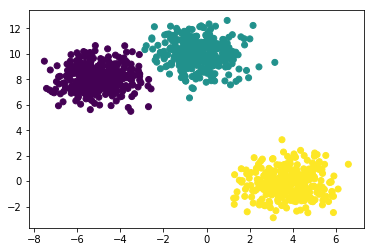

In [108]:
X, Y = make_blobs(n_samples=1000, n_features=3, centers=3, center_box=(-10, 10))

plt.scatter(X[:, 0], X[:, 1], c=Y)

In [109]:
model = KMeans(X, 3)

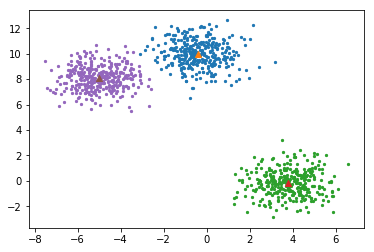

In [110]:
model.itrs(10)

for cluster in model.clusters:
    if len(cluster.points) > 0:
        dataset = np.array(cluster.points)
        plt.scatter(dataset[:, 0], dataset[:, 1], s=5)
    plt.scatter(cluster.center[0], cluster.center[1], marker='^')